In [6]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
d1=np.linspace(-1,0,101)

In [5]:
a = [-0.998,-0.75,-0.5,-0.25,0.0,0.2,0.35,0.5,0.6,0.69,0.77,0.837326,0.868951,0.893951,0.915432,0.934626,0.952174,0.968463,0.983746,0.9982]
h = [2.0, 2.7, 3.0, 3.0, 3.01, 3.0, 2.99, 2.97, 2.96, 2.9, 2.74, 2.6, 2.51, 2.465, 2.37, 2.315, 2.256, 2.14, 2.045, 1.901]
h1 = [1.1589, 1.89, 2.13397, 2.24539, 2.27, 2.23798, 2.19106, 2.11397, 2.04, 1.95895, 1.86547, 1.75591, 1.69944, 1.6485, 1.5887, 1.53764, 1.47306, 1.4, 1.30573, 1.15537]
isco = [8.64339, 7.9241, 7.17848, 6.40253, 5.6693, 5.06747, 4.52077, 4.03432, 3.63765, 3.25376, 2.88743, 2.61385, 2.44202, 2.2889, 2.14226, 1.99497, 1.83984, 1.66498, 1.43527, 1.22749]

dp = [[-0.638929, 5.034758],[-1.2768, 4.0252],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 1.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.511303, 3.095341],[-2.604326, 3.224055],[-2.891916, 3.073374],[-3.473296, 4.071166],[-3.675108, 4.196506],[-3.89373, 4.170298],[-3.707587, 4.030691],[-3.522032, 4.124454],[-4.139346, 4.043034],[-4.925592, 4.079079],[-5.63, 4.027834]]

In [13]:
dp=[]
for spin in a:
    if spin==0.0:
        dp.append([-3.0,1.0])
    else:
        dp.append([-3.0,3.0])

In [14]:
print(dp)

[[-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 1.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0], [-3.0, 3.0]]


In [16]:
i=10
dpdel = (dp[i][1] - dp[i][0]) / 28
shift = dpdel*int(dp[i][0] / dpdel)
zero = 0

dd = [dp[i][0]]
for k in range(28):
        dd.append(shift + k*dpdel)
        if shift + k*dpdel < 10 ** (-5):
                zero = k
dd.append(dp[i][1])

dd

[-3.0,
 -3.0,
 -2.7857142857142856,
 -2.5714285714285716,
 -2.357142857142857,
 -2.142857142857143,
 -1.9285714285714286,
 -1.7142857142857144,
 -1.5,
 -1.2857142857142858,
 -1.0714285714285716,
 -0.8571428571428572,
 -0.6428571428571428,
 -0.4285714285714288,
 -0.2142857142857144,
 0.0,
 0.21428571428571397,
 0.4285714285714284,
 0.6428571428571428,
 0.8571428571428568,
 1.0714285714285712,
 1.2857142857142856,
 1.5,
 1.7142857142857144,
 1.928571428571428,
 2.1428571428571423,
 2.3571428571428568,
 2.571428571428571,
 2.7857142857142856,
 3.0]

In [5]:

import sympy as sp
import pickle
import numpy as np
a = [-0.998,-0.75,-0.5,-0.25,0.0,0.2,0.35,0.5,0.6,0.69,0.77,0.837326,0.868951,0.893951,0.915432,0.934626,0.952174,0.968463,0.983746,0.9982]
h = [2.0, 2.7, 3.0, 3.0, 3.01, 3.0, 2.99, 2.97, 2.96, 2.9, 2.74, 2.6, 2.51, 2.465, 2.37, 2.315, 2.256, 2.14, 2.045, 1.901]
h1 = [1.1589, 1.89, 2.13397, 2.24539, 2.27, 2.23798, 2.19106, 2.11397, 2.04, 1.95895, 1.86547, 1.75591, 1.69944, 1.6485, 1.5887, 1.53764, 1.47306, 1.4, 1.30573, 1.15537]
isco = [8.64339, 7.9241, 7.17848, 6.40253, 5.6693, 5.06747, 4.52077, 4.03432, 3.63765, 3.25376, 2.88743, 2.61385, 2.44202, 2.2889, 2.14226, 1.99497, 1.83984, 1.66498, 1.43527, 1.22749]
dp=[]
for spin in a:
    if spin==0.0:
        dp.append([-3.0,1.0])
    else:
        dp.append([-3.0,3.0])
#dp = [[-0.638929, 5.034758],[-1.2768, 4.0252],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 1.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.511303, 3.095341],[-2.604326, 3.224055],[-2.891916, 3.073374],[-3.473296, 4.071166],[-3.675108, 4.196506],[-3.89373, 4.170298],[-3.707587, 4.030691],[-3.522032, 4.124454],[-4.139346, 4.043034],[-4.925592, 4.079079],[-5.63, 4.027834]]

i=0
for i in np.arange(30):
    if i==0 or i==1 or i==2 or i==3 or i==10:
        continue
    dpdel = (dp[i][1] - dp[i][0]) / 28
    shift = dpdel*int(dp[i][0] / dpdel)
    zero = 0

    dd = [dp[i][0]]
    for k in range(28):
            dd.append(shift + k*dpdel)
            if shift + k*dpdel < 10 ** (-5):
                    zero = k
    dd.append(dp[i][1])

    print(dd)

    myr1=[]
    myr2=[]
    spin=a[i]
    theta=0
    r0 = 1 + np.sqrt(1 - spin**2);
    e0 = (2 - r0) / r0;
    k00 = spin**2 / r0**2;
    a20=2*spin**2/r0**3
    a21=-spin**4/r0**4
    k21=spin**4/r0**4-2*spin**2/r0**2
    k22=-spin**2/r0**2
    k23=spin**2/r0**2
    for d1 in dd:
        #def fun(r):
        #    
        #    g=metric_KRZ(0.1,d1[i],r,np.pi/2)
        #    return g[0][0]
        #r1=fsolve(fun,3)
        #r2=fsolve(fun,0.01)

        print('%f %f'%(spin,d1))
        x = sp.Symbol('x')
        f = (1-r0/x)*(1-e0*r0/x +(k00-e0)*r0**2/x**2 + d1*r0**3/x**3 ) + (a20*r0**3/x**3 +a21*r0**4/x**4 + k21*r0**3/x**3/( 1+ k22*(1-r0/x)/(1+k23*(1-r0/x)) ) )*np.cos(theta)**2  #x**3 - e0*r0*x**2 + (k00-e0)* r0**2 *x + d1[i]*r0**3 #对cos theta=0的情况
        r=sp.solve(f)
        #if d1[i]>-0.02:
        print(r)
        if len(r)<2:
            myr1.append(0)
            myr2.append(r[0])
        else:
            myr1.append(r[0])
            myr2.append(r[1])
        #print(r[1])

        #print(r[2])

        #print(r[0])

        #myr1.append(complex(r[1]))
        #myr2.append(complex(r[2]))
        #myr3.append(complex(r[0]))
    pickle.dump(np.array(dd),open('dd_a%d_%.6f.p'%(i,spin),'wb'))
    pickle.dump(1.1*np.array(myr2),open('hg_a%d_%.6f.p'%(i,spin),'wb'))
#rmd8=np.array(myr1)
#rpd8=np.array(myr2)

[-3.0, -3.0, -2.857142857142857, -2.7142857142857144, -2.5714285714285716, -2.428571428571429, -2.2857142857142856, -2.142857142857143, -2.0, -1.8571428571428572, -1.7142857142857144, -1.5714285714285716, -1.4285714285714286, -1.2857142857142858, -1.142857142857143, -1.0, -0.8571428571428572, -0.7142857142857144, -0.5714285714285716, -0.4285714285714288, -0.28571428571428603, -0.14285714285714324, 0.0, 0.1428571428571428, 0.2857142857142856, 0.4285714285714284, 0.5714285714285712, 0.714285714285714, 0.8571428571428568, 1.0]
0.000000 -3.000000
[2.00000000000000, 2.88449914061482, -1.44224957030741 - 2.49804953296681*I, -1.44224957030741 + 2.49804953296681*I]
0.000000 -3.000000
[2.00000000000000, 2.88449914061482, -1.44224957030741 - 2.49804953296681*I, -1.44224957030741 + 2.49804953296681*I]
0.000000 -2.857143
[2.00000000000000, 2.83796682394077, -1.41898341197038 - 2.45775136463014*I, -1.41898341197038 + 2.45775136463014*I]
0.000000 -2.714286
[2.00000000000000, 2.78985639708655, -1.394

[-2.45518637493535, 1.98664799424352, 1.23426919034592 - 2.13325470316771*I, 1.23426919034592 + 2.13325470316771*I]
0.200000 2.142857
[-2.54340113461410, 1.98618074823676, 1.27861019318867 - 2.20946728290719*I, 1.27861019318867 + 2.20946728290719*I]
0.200000 2.357143
[-2.62590496805818, 1.98577299601272, 1.32006598602273 - 2.28076957493236*I, 1.32006598602273 + 2.28076957493236*I]
0.200000 2.571429
[-2.70354092853714, 1.98541408051848, 1.35906342400933 - 2.34788302565912*I, 1.35906342400933 + 2.34788302565912*I]
0.200000 2.785714
[-2.77696903183154, 1.98509574140454, 1.3959366452135 - 2.41137308822107*I, 1.3959366452135 + 2.41137308822107*I]
0.200000 3.000000
[-2.84671681295634, 1.98481147838430, 1.43095266728602 - 2.47169216225649*I, 1.43095266728602 + 2.47169216225649*I]
[-3.0, -3.0, -2.7857142857142856, -2.5714285714285716, -2.357142857142857, -2.142857142857143, -1.9285714285714286, -1.7142857142857144, -1.5, -1.2857142857142858, -1.0714285714285716, -0.8571428571428572, -0.6428571

[-1.32716876596138, 1.95326820976670, 0.686950278097338 - 1.22890906941577*I, 0.686950278097338 + 1.22890906941577*I]
0.500000 0.642857
[-1.53738370374927, 1.94269326780185, 0.79734521797371 - 1.3980566116162*I, 0.79734521797371 + 1.3980566116162*I]
0.500000 0.857143
[-1.70343928615686, 1.93426489518855, 0.884587195484156 - 1.53428730999288*I, 0.884587195484156 + 1.53428730999288*I]
0.500000 1.071429
[-1.84303436940351, 1.92742360262129, 0.95780538339111 - 1.65023024691256*I, 0.95780538339111 + 1.65023024691256*I]
0.500000 1.285714
[-1.96469162882910, 1.92177839422536, 1.02145661730187 - 1.75214049593093*I, 1.02145661730187 + 1.75214049593093*I]
0.500000 1.500000
[-2.07324631011031, 1.91705159503370, 1.0780973575383 - 1.84364108560606*I, 1.0780973575383 + 1.84364108560606*I]
0.500000 1.714286
[-2.17173652771571, 1.91304240488154, 1.12934706141709 - 1.92704701018845*I, 1.12934706141709 + 1.92704701018845*I]
0.500000 1.928571
[-2.26221020000119, 1.90960294665019, 1.1763036266755 - 2.0039

[1.42387044701376, 2.17173616659129, -0.797803306802527 - 1.57623368506226*I, -0.797803306802527 + 1.57623368506226*I]
0.690000 -0.857143
[1.35411830308044, 2.11509284296411, -0.734605573022278 - 1.47287895105576*I, -0.734605573022278 + 1.47287895105576*I]
0.690000 -0.642857
[1.25676350278860, 2.06257287382364, -0.659668188306124 - 1.35206982051608*I, -0.659668188306124 + 1.35206982051608*I]
0.690000 -0.428571
[1.11509982918315, 2.01559884168754, -0.565349335435345 - 1.20364572483161*I, -0.565349335435345 + 1.20364572483161*I]
0.690000 -0.214286
[0.886145057438603, 1.97502077432886, -0.430582915883731 - 1.00223834908551*I, -0.430582915883731 + 1.00223834908551*I]
0.690000 0.000000
[0.241778316494065, 1.94093411200862, -0.0913562142513453 - 0.630307027269286*I, -0.0913562142513453 + 0.630307027269286*I]
0.690000 0.214286
[-0.830430026229798, 1.91280816282947, 0.45881093170016 - 0.927810335776187*I, 0.45881093170016 + 0.927810335776187*I]
0.690000 0.428571
[-1.13355308314346, 1.889781880

[1.35570963929781, 2.39444032271533, -0.875074981006567 - 1.81837251556156*I, -0.875074981006567 + 1.81837251556156*I]
0.868951 -2.357143
[1.34314968652377, 2.34952076485034, -0.846335225687055 - 1.77017191455397*I, -0.846335225687055 + 1.77017191455397*I]
0.868951 -2.142857
[1.32829634746707, 2.30334905062474, -0.815822699045905 - 1.71916739572785*I, -0.815822699045905 + 1.71916739572785*I]
0.868951 -1.928571
[1.31051548140580, 2.25595341922376, -0.783234450314779 - 1.6649085178822*I, -0.783234450314779 + 1.6649085178822*I]
0.868951 -1.714286
[1.28893720312275, 2.20741297487978, -0.748175089001262 - 1.60681591410895*I, -0.748175089001262 + 1.60681591410895*I]
0.868951 -1.500000
[1.26234436276896, 2.15788159193686, -0.710112977352909 - 1.54412415579942*I, -0.710112977352909 + 1.54412415579942*I]
0.868951 -1.285714
[1.22899348304476, 2.10761867479351, -0.668306078919136 - 1.47578778466746*I, -0.668306078919136 + 1.47578778466746*I]
0.868951 -1.071429
[1.18631053120284, 2.05702444568988,

[1.28567890556549, 2.38716837848014, -0.836423642022815 - 1.79259359958539*I, -0.836423642022815 + 1.79259359958539*I]
0.915432 -3.000000
[1.28567890556549, 2.38716837848014, -0.836423642022815 - 1.79259359958539*I, -0.836423642022815 + 1.79259359958539*I]
0.915432 -2.785714
[1.27697828716284, 2.34776606200741, -0.812372174585123 - 1.75194286738002*I, -0.812372174585123 + 1.75194286738002*I]
0.915432 -2.571429
[1.26695258454856, 2.30721368719944, -0.787083135873997 - 1.70930323066114*I, -0.787083135873997 + 1.70930323066114*I]
0.915432 -2.357143
[1.25529221187453, 2.26547339459253, -0.76038280323353 - 1.66441036811148*I, -0.76038280323353 + 1.66441036811148*I]
0.915432 -2.142857
[1.24158887117790, 2.22252062569382, -0.732054748435862 - 1.6169385670659*I, -0.732054748435862 + 1.6169385670659*I]
0.915432 -1.928571
[1.22529511983590, 2.17835273133015, -0.701823925583026 - 1.56647915579441*I, -0.701823925583026 + 1.56647915579441*I]
0.915432 -1.714286
[1.20566322082188, 2.13300149714131, -

[-1.54716001604895, 1.47976843533771, 1.03369579035562 - 1.49457757095982*I, 1.03369579035562 + 1.49457757095982*I]
0.934626 2.571429
[-1.60293777420827, 1.47133128479526, 1.06580324470651 - 1.54161439572399*I, 1.06580324470651 + 1.54161439572399*I]
0.934626 2.785714
[-1.65549292165334, 1.46389716892841, 1.09579787636246 - 1.58622968486185*I, 1.09579787636246 + 1.58622968486185*I]
0.934626 3.000000
[-1.70525277089436, 1.45730898523283, 1.12397189283077 - 1.628697891351*I, 1.12397189283077 + 1.628697891351*I]
[-3.0, -3.0, -2.7857142857142856, -2.5714285714285716, -2.357142857142857, -2.142857142857143, -1.9285714285714286, -1.7142857142857144, -1.5, -1.2857142857142858, -1.0714285714285716, -0.8571428571428572, -0.6428571428571428, -0.4285714285714288, -0.2142857142857144, 0.0, 0.21428571428571397, 0.4285714285714284, 0.6428571428571428, 0.8571428571428568, 1.0714285714285712, 1.2857142857142856, 1.5, 1.7142857142857144, 1.928571428571428, 2.1428571428571423, 2.3571428571428568, 2.57142

[-0.862148954726660, 1.48062650295411, 0.690761225886271 - 0.939600704687959*I, 0.690761225886271 + 0.939600704687959*I]
0.968463 1.071429
[-0.966359899451328, 1.45530603239881, 0.755526933526255 - 1.01716521826819*I, 0.755526933526255 + 1.01716521826819*I]
0.968463 1.285714
[-1.05523988215811, 1.43380782396190, 0.810716029098102 - 1.08620859169927*I, 0.810716029098102 + 1.08620859169927*I]
0.968463 1.500000
[-1.13340162499256, 1.41560493851877, 0.858898343236898 - 1.14886693708686*I, 0.858898343236898 + 1.14886693708686*I]
0.968463 1.714286
[-1.20357719594992, 1.40016933384863, 0.901703931050641 - 1.20645210293305*I, 0.901703931050641 + 1.20645210293305*I]
0.968463 1.928571
[-1.26753269523246, 1.38702478352849, 0.940253955851986 - 1.25985575589711*I, 0.940253955851986 + 1.25985575589711*I]
0.968463 2.142857
[-1.32648287520373, 1.37576587003241, 0.975358502585658 - 1.30972862250641*I, 0.975358502585658 + 1.30972862250641*I]
0.968463 2.357143
[-1.38130296452388, 1.36605820561014, 1.0076

[0.932943356622472, 1.50414921437687, -0.218546285499671 - 0.781402458272295*I, -0.218546285499671 + 0.781402458272295*I]
0.998200 -0.428571
[0.895754455936324, 1.44738984509653, -0.171572150516424 - 0.688837388170815*I, -0.171572150516424 + 0.688837388170815*I]
0.998200 -0.214286
[0.831929622786533, 1.38888746772509, -0.11040854525581 - 0.564934451509446*I, -0.11040854525581 + 0.564934451509446*I]
0.998200 0.000000
[0.692005338767098, 1.33106346100555, -0.0115343998863215 - 0.349051493957341*I, -0.0115343998863215 + 0.349051493957341*I]
0.998200 0.214286
[-0.312160378480575, 1.27787216649753, 0.517144105991524 - 0.35922410033694*I, 0.517144105991524 + 0.35922410033694*I]
0.998200 0.428571
[-0.503480592546198, 1.23328722441866, 0.635096684063769 - 0.535720151386218*I, 0.635096684063769 + 0.535720151386218*I]
0.998200 0.642857
[-0.626642054401739, 1.19886266230314, 0.713889696049303 - 0.648858776491512*I, 0.713889696049303 + 0.648858776491512*I]
0.998200 0.857143
[-0.721996891840964, 1.

IndexError: list index out of range

In [19]:
import sympy as sp
import pickle
import numpy as np
a = [-0.998,-0.75,-0.5,-0.25,0.0,0.2,0.35,0.5,0.6,0.69,0.77,0.837326,0.868951,0.893951,0.915432,0.934626,0.952174,0.968463,0.983746,0.9982]
h = [2.0, 2.7, 3.0, 3.0, 3.01, 3.0, 2.99, 2.97, 2.96, 2.9, 2.74, 2.6, 2.51, 2.465, 2.37, 2.315, 2.256, 2.14, 2.045, 1.901]
h1 = [1.1589, 1.89, 2.13397, 2.24539, 2.27, 2.23798, 2.19106, 2.11397, 2.04, 1.95895, 1.86547, 1.75591, 1.69944, 1.6485, 1.5887, 1.53764, 1.47306, 1.4, 1.30573, 1.15537]
isco = [8.64339, 7.9241, 7.17848, 6.40253, 5.6693, 5.06747, 4.52077, 4.03432, 3.63765, 3.25376, 2.88743, 2.61385, 2.44202, 2.2889, 2.14226, 1.99497, 1.83984, 1.66498, 1.43527, 1.22749]
dp=[]
for spin in a:
    if spin==0.0:
        dp.append([-3.0,1.0])
    else:
        dp.append([-3.0,3.0])
#dp = [[-0.638929, 5.034758],[-1.2768, 4.0252],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.0, 1.357143],[-2.0, 3.357143],[-2.0, 3.357143],[-2.511303, 3.095341],[-2.604326, 3.224055],[-2.891916, 3.073374],[-3.473296, 4.071166],[-3.675108, 4.196506],[-3.89373, 4.170298],[-3.707587, 4.030691],[-3.522032, 4.124454],[-4.139346, 4.043034],[-4.925592, 4.079079],[-5.63, 4.027834]]

i=0
for i in np.arange(20):
    spin=a[i]
    print(i)
    dd=pickle.load(open('dd_a%d_%.6f.p'%(i,spin),'rb'))
    myr2=pickle.load(open('hg_a%d_%.6f.p'%(i,spin),'rb'))
    print(myr2)
    myr2=np.array(myr2)
    #for indmyr in np.arange(len(myr2)):
    #    if np.imag(myr2[indmyr])!=0:
    #        myr2[indmyr]=2.2
    if i==4:
        myr2[15]=2.2
    print(myr2)
    np.savetxt('dd_a%d_%.6f.txt'%(i,spin),np.array(dd))
    np.savetxt('hg_a%d_%.6f.txt'%(i,spin),1.1*np.array(myr2))

0
[2.16433438797458 2.16433438797458 2.12864243621855 2.09150549493817
 2.05277990321107 2.01230110976090 1.96988078871539 1.92530453894178
 1.87833161247694 1.82869993837781 1.77614368984261 1.72043922157565
 1.66151268387154 1.59967220136023 1.53604673927918 1.47318333103421
 1.41517557374858 1.36616783639522 1.32791757348028 1.29935848381619
 1.27822299486068 1.26238697548668 1.25027148221311 1.24079147244320
 1.23321431542357 1.22704150176415 1.22192778173846 1.21762900878630
 1.21396885419821 1.21081738924322]
[2.16433438797458 2.16433438797458 2.12864243621855 2.09150549493817
 2.05277990321107 2.01230110976090 1.96988078871539 1.92530453894178
 1.87833161247694 1.82869993837781 1.77614368984261 1.72043922157565
 1.66151268387154 1.59967220136023 1.53604673927918 1.47318333103421
 1.41517557374858 1.36616783639522 1.32791757348028 1.29935848381619
 1.27822299486068 1.26238697548668 1.25027148221311 1.24079147244320
 1.23321431542357 1.22704150176415 1.22192778173846 1.21762900878

13
[2.67753989210369 2.67753989210369 2.63259375808606 2.58634928572085
 2.53877126584882 2.48984316467161 2.43957836967197 2.38803635135266
 2.33534514257130 2.28173100328239 2.22755416647239 2.17334492462601
 2.11982617910778 2.06789906159665 2.01856625921065 1.97278741690231
 1.93130459199732 1.89451189703017 1.86242830733120 1.83477096707538
 1.81107591026244 1.79081086854786 1.77345294062788 1.75852994720773
 1.74563576577686 1.73443074176255 1.72463512563557 1.71602017915728
 1.70839927927727 1.70162000002016]
[2.67753989210369 2.67753989210369 2.63259375808606 2.58634928572085
 2.53877126584882 2.48984316467161 2.43957836967197 2.38803635135266
 2.33534514257130 2.28173100328239 2.22755416647239 2.17334492462601
 2.11982617910778 2.06789906159665 2.01856625921065 1.97278741690231
 1.93130459199732 1.89451189703017 1.86242830733120 1.83477096707538
 1.81107591026244 1.79081086854786 1.77345294062788 1.75852994720773
 1.74563576577686 1.73443074176255 1.72463512563557 1.7160201791

In [34]:
import pickle
pickle.dump(np.array(dd),open('dd_a%d_%.6f.p'%(i,spin),'wb'))
pickle.dump(1.1*np.array(myr2),open('hg_a%d_%.6f.p'%(i,spin),'wb'))

In [35]:
dd=pickle.load(open('dd_a%d_%.6f.p'%(i,spin),'rb'))
print(hg)
print(dd)

[2.87490102132757 2.87490102132757 2.82207820028962 2.76769525042323
 2.71173738068885 2.65423199548026 2.59527309968348 2.53505618274444
 2.47392519782625 2.41242921077796 2.35137620929735 2.29185378397317
 2.23516850493792 2.18266444255618 2.13544699426473 2.09413321754209
 2.05876672885669 2.02892470681318 2.00392140151178 1.98299522940361
 1.96542731061925 1.95059492836134 1.93798349166460 1.92717823043096
 1.91784870578457 1.90973261165541 1.90262146402137 1.89634886708985
 1.89078124137854 1.88581062968984]
[-3.         -3.         -2.78571429 -2.57142857 -2.35714286 -2.14285714
 -1.92857143 -1.71428571 -1.5        -1.28571429 -1.07142857 -0.85714286
 -0.64285714 -0.42857143 -0.21428571  0.          0.21428571  0.42857143
  0.64285714  0.85714286  1.07142857  1.28571429  1.5         1.71428571
  1.92857143  2.14285714  2.35714286  2.57142857  2.78571429  3.        ]


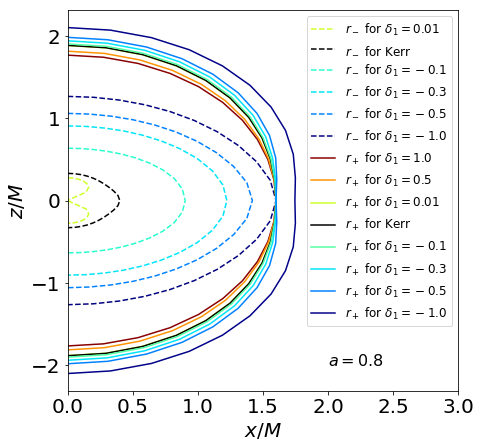

In [201]:
#plt.plot(d1[0:100],np.real(myr1))
#plt.plot(d1[0:100],myr2)
plt.figure(figsize=[7,7])
#myr1=np.array(myr1)
#myr2=np.array(myr2)
plt.plot(rmd7*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmd7,'--',color=plt.cm.jet(0.6),label='$r_-$ for $\delta_1=0.01$')
plt.plot(rmkerr*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmkerr,'--',color='k',label='$r_-$ for Kerr')
plt.plot(rmd5*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmd5,'--',color=plt.cm.jet(0.4),label='$r_-$ for $\delta_1=-0.1$')
plt.plot(rmd4*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmd4,'--',color=plt.cm.jet(0.35),label='$r_-$ for $\delta_1=-0.3$')
plt.plot(rmd3*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmd3,'--',color=plt.cm.jet(0.25),label='$r_-$ for $\delta_1=-0.5$')
plt.plot(rmd2*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmd2,'--',color=plt.cm.jet(0),label='$r_-$ for $\delta_1=-1.0$')

#plt.plot(rmd1*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rmd1,label='$r_-$')
plt.plot(rpd1*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd1,color=plt.cm.jet(0.99),label='$r_+$ for $\delta_1=1.0$')
plt.plot(rpd6*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd6,color=plt.cm.jet(0.75),label='$r_+$ for $\delta_1=0.5$')
plt.plot(rpd7*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd7,color=plt.cm.jet(0.6),label='$r_+$ for $\delta_1=0.01$')
plt.plot(rpkerr*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpkerr,color='k',label='$r_+$ for Kerr')
plt.plot(rpd5*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd5,color=plt.cm.jet(0.45),label='$r_+$ for $\delta_1=-0.1$')
plt.plot(rpd4*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd4,color=plt.cm.jet(0.35),label='$r_+$ for $\delta_1=-0.3$')
plt.plot(rpd3*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd3,color=plt.cm.jet(0.25),label='$r_+$ for $\delta_1=-0.5$')
plt.plot(rpd2*np.sin(np.arange(0,np.pi+0.01,np.pi/20)),np.cos(np.arange(0,np.pi+0.01,np.pi/20))*rpd2,color=plt.cm.jet(0.01),label='$r_+$ for $\delta_1=-1.0$')
#plt.plot(np.arange(0,np.pi,np.pi/20),myr2)
#plt.ylim(-0.1,2)
plt.xlabel('$x/M$',fontsize=20)
plt.ylabel('$z/M$',fontsize=20)
plt.legend(fontsize=12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,3)
plt.text(2.0,-2.0,'$a=0.8$',fontsize=16)
plt.savefig('horizon_kerr.pdf')

In [174]:
import pickle
pickle.dump({'Kerr+':rpkerr,'Kerr-':rmkerr,'d_1.0+':rpd1,'d_-1.0+':rpd2,'d_-1.0-':rmd2,'d_-0.5+':rpd3,'d_-0.5-':rmd3,'d_-0.5+':rpd4,'d_-0.3-':rmd4,'d_-0.1+':rpd5,'d_-0.1-':rmd5},open('horizon.p','wb'))

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


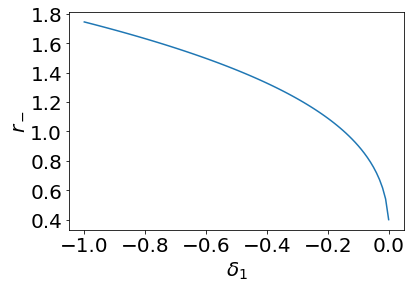

In [123]:
#plt.plot(d1[0:100],np.real(myr1))
#plt.plot(d1[0:100],myr2)

plt.plot(d1,myr3[0:101])
#plt.ylim(-0.1,2)
plt.xlabel('$\delta_1$',fontsize=20)
plt.ylabel('$r_-$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('horizon_d1.pdf')

In [119]:
1-np.sqrt(1-0.64)

0.40000000000000002

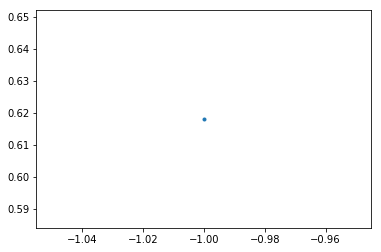

In [78]:
plt.plot(rt[0],rt[1],'.')

In [86]:
myr1

[-0.888897409907039 - 1.61511459629248*I,
 -0.885778793283581 - 1.60970678206489*I,
 -0.882639117310185 - 1.60426240774684*I,
 -0.879478022779245 - 1.59878084915341*I,
 -0.876295140577926 - 1.59326146487343*I,
 -0.873090091308648 - 1.58770359560902*I,
 -0.869862484890883 - 1.58210656348246*I,
 -0.866611920143101 - 1.57646967130861*I,
 -0.863337984343684 - 1.57079220183061*I,
 -0.860040252769487 - 1.56507341691668*I,
 -0.856718288210657 - 1.55931255671556*I,
 -0.85337164046021 - 1.55350883876796*I,
 -0.849999845776749 - 1.54766145707126*I,
 -0.846602426318597 - 1.54176958109437*I,
 -0.843178889547466 - 1.53583235473951*I,
 -0.839728727599652 - 1.52984889524748*I,
 -0.83625141662258 - 1.52381829204246*I,
 -0.832746416074363 - 1.51773960551246*I,
 -0.829213167983831 - 1.51161186572078*I,
 -0.82565109616828 - 1.5054340710439*I,
 -0.822059605406001 - 1.49920518673049*I,
 -0.818438080560332 - 1.49292414337596*I,
 -0.814785885651785 - 1.48658983530655*I,
 -0.811102362874428 - 1.48020111886616

In [89]:
r[1]

TypeError: 'Add' object does not support indexing

In [90]:
d1

array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
       -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
       -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
       -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
       -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
       -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,
        0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,
        0.26,  0.27,

In [128]:
sp.sqrt(2)+1+sp.cos(np.pi/2)


1.0 + sqrt(2)